In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import pingouin as pi
import os
import statistics
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.pylab import rcParams
import calmap
import calplot
from vega_datasets import data as vds

In [2]:
df = pd.read_csv("D:/JAINAM/Cleaned_INR=X_14.csv", index_col='Date', parse_dates=True)
df

C:\Users\alish\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '29-08-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\alish\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '15-09-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\alish\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '16-09-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\alish\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '17-09-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\alish\anaconda3\lib

,Open,High,Low,Close,Adj Close
Date,,,,,
2008-08-29,43.645000,43.910000,43.625000,43.625000,43.625000
2008-01-09,43.930000,44.205002,43.930000,43.973999,43.973999
2008-02-09,44.101002,44.490002,44.101002,44.257000,44.257000
2008-04-09,43.895000,44.509998,43.895000,44.388000,44.388000
2008-05-09,44.205002,44.639999,44.205002,44.573002,44.573002
...,...,...,...,...,...
2023-03-01,82.706001,83.030998,82.600998,82.706001,82.706001
2023-04-01,82.785698,83.003304,82.695999,82.785698,82.785698
2023-05-01,82.666496,82.794998,82.428802,82.666496,82.666496


In [3]:
df1 = pd.read_csv("D:/JAINAM/Cleaned_Nifty_14.csv", index_col='Date', parse_dates=True)
df1

C:\Users\alish\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '29-08-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\alish\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '15-09-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\alish\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '16-09-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\alish\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '17-09-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\alish\anaconda3\lib

,Open,High,Low,Close,Adj Close
Date,,,,,
2008-08-29,4230.600098,4368.799805,4230.600098,4360.000000,4360.000000
2008-01-09,4356.100098,4365.000000,4281.350098,4348.649902,4348.649902
2008-02-09,4358.850098,4522.399902,4343.100098,4504.000000,4504.000000
2008-04-09,4512.950195,4514.600098,4419.450195,4447.750000,4447.750000
2008-05-09,4444.700195,4444.700195,4328.899902,4352.299805,4352.299805
...,...,...,...,...,...
2023-03-01,18163.199220,18251.949220,18149.800780,18232.550780,18232.550780
2023-04-01,18230.650390,18243.000000,18020.599610,18042.949220,18042.949220
2023-05-01,18101.949220,18120.300780,17892.599610,17992.150390,17992.150390


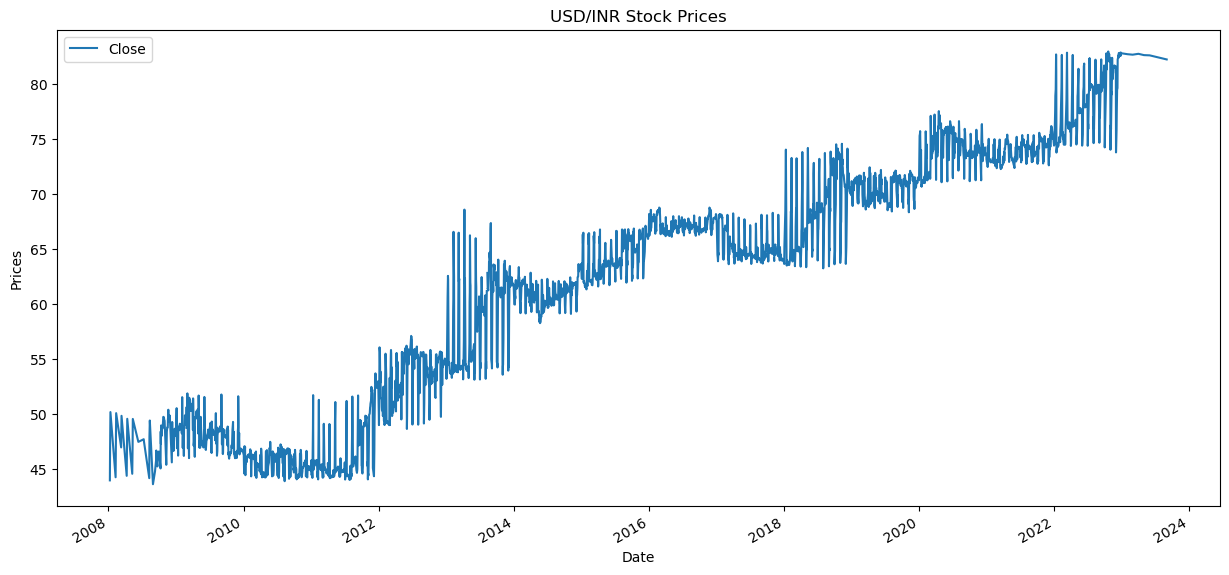

In [4]:
df['Close'].plot(figsize=(15,7))
plt.title("USD/INR Stock Prices")
plt.ylabel("Prices")
plt.legend()
plt.show()

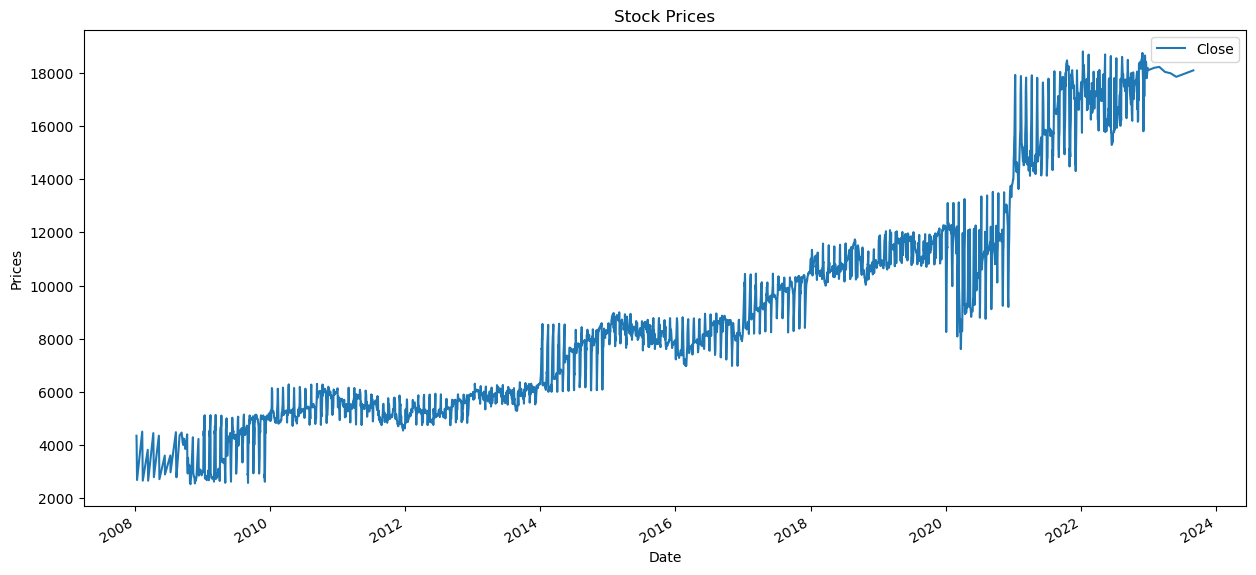

In [5]:
df1['Close'].plot(figsize=(15,7))
plt.title("Stock Prices")
plt.ylabel("Prices")
plt.legend()
plt.show()

In [6]:
#df['Price First Difference'] = df['Close']-df['Close'].shift(1)

In [7]:
#df['Close'].shift(1)

In [8]:
#df['Seasonal First Difference']=df['Close']-df['Close'].shift(21)#

In [9]:
#df.tail(20)

In [10]:
df['MA'] = df['Close'].rolling(window=21).mean()
df['STD'] = df['Close'].rolling(window=21).std()
df.head(22)

,Open,High,Low,Close,Adj Close,MA,STD
Date,,,,,,,
2008-08-29,43.645000,43.910000,43.625000,43.625000,43.625000,NaN,NaN
2008-01-09,43.930000,44.205002,43.930000,43.973999,43.973999,NaN,NaN
2008-02-09,44.101002,44.490002,44.101002,44.257000,44.257000,NaN,NaN
2008-04-09,43.895000,44.509998,43.895000,44.388000,44.388000,NaN,NaN
2008-05-09,44.205002,44.639999,44.205002,44.573002,44.573002,NaN,NaN
2008-08-09,44.573002,44.590000,44.130001,44.175999,44.175999,NaN,NaN
2008-09-09,44.424999,44.910000,44.424999,44.785999,44.785999,NaN,NaN
2008-10-09,44.665001,45.134998,44.665001,45.058998,45.058998,NaN,NaN
2008-11-09,44.990002,45.549999,44.990002,45.389999,45.389999,NaN,NaN


In [11]:
df1['MA1'] = df1['Close'].rolling(window=21).mean()
df1['STD1'] = df1['Close'].rolling(window=21).std()
df1.head(22)

,Open,High,Low,Close,Adj Close,MA1,STD1
Date,,,,,,,
2008-08-29,4230.600098,4368.799805,4230.600098,4360.000000,4360.000000,NaN,NaN
2008-01-09,4356.100098,4365.000000,4281.350098,4348.649902,4348.649902,NaN,NaN
2008-02-09,4358.850098,4522.399902,4343.100098,4504.000000,4504.000000,NaN,NaN
2008-04-09,4512.950195,4514.600098,4419.450195,4447.750000,4447.750000,NaN,NaN
2008-05-09,4444.700195,4444.700195,4328.899902,4352.299805,4352.299805,NaN,NaN
2008-08-09,4358.299805,4558.000000,4358.299805,4482.299805,4482.299805,NaN,NaN
2008-09-09,4485.149902,4497.500000,4418.950195,4468.700195,4468.700195,NaN,NaN
2008-10-09,4467.500000,4467.500000,4382.350098,4400.250000,4400.250000,NaN,NaN
2008-11-09,4397.250000,4399.299805,4272.750000,4290.299805,4290.299805,NaN,NaN


In [12]:
df.dropna(inplace=True)
df

,Open,High,Low,Close,Adj Close,MA,STD
Date,,,,,,,
2008-09-29,46.498001,47.033001,46.493000,46.493000,46.493000,45.369143,0.930168
2008-09-30,46.493000,46.950001,46.452999,46.601002,46.601002,45.510857,0.876297
2008-01-10,46.467999,47.165001,46.467999,46.567001,46.567001,45.634333,0.830400
2008-03-10,46.213001,47.090000,46.213001,46.973000,46.973000,45.763667,0.816547
2008-06-10,46.973000,47.820000,46.973000,47.564999,47.564999,45.914952,0.842813
...,...,...,...,...,...,...,...
2023-03-01,82.706001,83.030998,82.600998,82.706001,82.706001,82.607348,0.260966
2023-04-01,82.785698,83.003304,82.695999,82.785698,82.785698,82.649572,0.206722
2023-05-01,82.666496,82.794998,82.428802,82.666496,82.666496,82.663586,0.196711


In [13]:
df1.dropna(inplace=True)
df1

,Open,High,Low,Close,Adj Close,MA1,STD1
Date,,,,,,,
2008-09-29,3990.199951,3997.550049,3777.300049,3850.050049,3850.050049,4227.580904,185.801730
2008-09-30,3848.699951,3966.850098,3715.050049,3921.199951,3921.199951,4206.685663,194.629301
2008-01-10,3921.850098,4000.500000,3861.250000,3950.750000,3950.750000,4187.738049,199.426836
2008-03-10,3953.550049,3969.550049,3804.850098,3818.300049,3818.300049,4155.085670,201.183292
2008-06-10,3817.300049,3820.850098,3581.600098,3602.350098,3602.350098,4114.828532,223.083523
...,...,...,...,...,...,...,...
2023-03-01,18163.199220,18251.949220,18149.800780,18232.550780,18232.550780,18318.726283,234.626356
2023-04-01,18230.650390,18243.000000,18020.599610,18042.949220,18042.949220,18290.164341,229.665048
2023-05-01,18101.949220,18120.300780,17892.599610,17992.150390,17992.150390,18263.100074,229.703033


In [14]:
df.head(20)

,Open,High,Low,Close,Adj Close,MA,STD
Date,,,,,,,
2008-09-29,46.498001,47.033001,46.493000,46.493000,46.493000,45.369143,0.930168
2008-09-30,46.493000,46.950001,46.452999,46.601002,46.601002,45.510857,0.876297
2008-01-10,46.467999,47.165001,46.467999,46.567001,46.567001,45.634333,0.830400
2008-03-10,46.213001,47.090000,46.213001,46.973000,46.973000,45.763667,0.816547
2008-06-10,46.973000,47.820000,46.973000,47.564999,47.564999,45.914952,0.842813
2008-07-10,47.783001,48.138000,47.660000,47.717999,47.717999,46.064714,0.871373
2008-08-10,47.792999,48.787998,47.792999,47.950001,47.950001,46.244429,0.851312
2008-10-10,47.563000,49.119999,47.563000,48.423000,48.423000,46.417619,0.907852
2008-10-13,48.459999,48.459999,48.002998,48.136002,48.136002,46.564143,0.925744


In [15]:
df1.head(20)

,Open,High,Low,Close,Adj Close,MA1,STD1
Date,,,,,,,
2008-09-29,3990.199951,3997.550049,3777.300049,3850.050049,3850.050049,4227.580904,185.801730
2008-09-30,3848.699951,3966.850098,3715.050049,3921.199951,3921.199951,4206.685663,194.629301
2008-01-10,3921.850098,4000.500000,3861.250000,3950.750000,3950.750000,4187.738049,199.426836
2008-03-10,3953.550049,3969.550049,3804.850098,3818.300049,3818.300049,4155.085670,201.183292
2008-06-10,3817.300049,3820.850098,3581.600098,3602.350098,3602.350098,4114.828532,223.083523
2008-07-10,3606.949951,3732.649902,3537.000000,3606.600098,3606.600098,4079.319022,241.945166
2008-08-10,3604.399902,3604.399902,3329.449951,3513.649902,3513.649902,4033.192836,253.343362
2008-10-10,3502.050049,3502.050049,3198.949951,3279.949951,3279.949951,3976.585682,282.318402
2008-10-13,3272.899902,3510.199951,3272.899902,3490.699951,3490.699951,3933.273775,283.837343


In [16]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['MA'])

In [17]:
def ad_test(dataset):
    datatest = adfuller(dataset, autolag = 'AIC')

    print("1. Test Statistics : ",datatest[0])
    print("2. P-Value : ",datatest[1])
    print("3. No of Lags : ",datatest[2])
    print("4. No of Obseravation used : ",datatest[3])
    print("5. Critical Value : ")
    for key, val in datatest[4].items():
        print("\t",key,":", val)
#P-value should be less than 0.05 or data will be considered as non stationary and we will need to run tests.

In [18]:
ad_test(df['MA'])
#if test_result[1] <= 0.05:
 #   print("Strong Evidence against the null hypothesis, Data is Non-stationary.")
#else:
    #print("Weak Evidence against the null hypothesis, Data is Stationary.")

1. Test Statistics :  -0.15652574672825456
2. P-Value :  0.9435091154023941
3. No of Lags :  24
4. No of Obseravation used :  3366
5. Critical Value : 
	 1% : -3.4322942346818146
	 5% : -2.8623990497346528
	 10% : -2.5672272889250407


In [19]:
#df['Price First Difference'] = df['Close']-df['Close'].shift(1)

In [20]:
#df['Close'].shift(1)

In [21]:
#df['Monthly First Difference']=df['Close']-df['Close'].shift(21)

In [22]:
#df.head(20)

In [23]:
#df1['Monthly First Difference1']=df1['Close']-df1['Close'].shift(21)

In [24]:
#df1.head(20)

In [25]:
df.dropna(inplace=True)
df.head(5)

,Open,High,Low,Close,Adj Close,MA,STD
Date,,,,,,,
2008-09-29,46.498001,47.033001,46.493000,46.493000,46.493000,45.369143,0.930168
2008-09-30,46.493000,46.950001,46.452999,46.601002,46.601002,45.510857,0.876297
2008-01-10,46.467999,47.165001,46.467999,46.567001,46.567001,45.634333,0.830400
2008-03-10,46.213001,47.090000,46.213001,46.973000,46.973000,45.763667,0.816547
2008-06-10,46.973000,47.820000,46.973000,47.564999,47.564999,45.914952,0.842813


In [26]:
#df['MA'].plot()

In [27]:
df1.dropna(inplace=True)
df1.head(5)

,Open,High,Low,Close,Adj Close,MA1,STD1
Date,,,,,,,
2008-09-29,3990.199951,3997.550049,3777.300049,3850.050049,3850.050049,4227.580904,185.801730
2008-09-30,3848.699951,3966.850098,3715.050049,3921.199951,3921.199951,4206.685663,194.629301
2008-01-10,3921.850098,4000.500000,3861.250000,3950.750000,3950.750000,4187.738049,199.426836
2008-03-10,3953.550049,3969.550049,3804.850098,3818.300049,3818.300049,4155.085670,201.183292
2008-06-10,3817.300049,3820.850098,3581.600098,3602.350098,3602.350098,4114.828532,223.083523


In [28]:
#df1['MA1'].plot()
#df1['STD1'].plot()

In [29]:
print(df.corrwith(df1,method='spearman'))

Open         0.901976
High         0.901560
Low          0.903345
Close        0.902184
Adj Close    0.902184
MA                NaN
MA1               NaN
STD               NaN
STD1              NaN
dtype: float64


In [30]:
df['Close'].describe()

count    3391.000000
mean       62.408981
std        10.717390
min        43.900002
25%        52.705000
50%        64.243896
75%        71.320499
max        82.997002
Name: Close, dtype: float64

In [31]:
df1['Close'].describe()

count     3496.000000
mean      8943.128220
std       3989.189525
min       2524.199951
25%       5613.262329
50%       8235.750000
75%      11057.937257
max      18812.500000
Name: Close, dtype: float64

<AxesSubplot:ylabel='Frequency'>

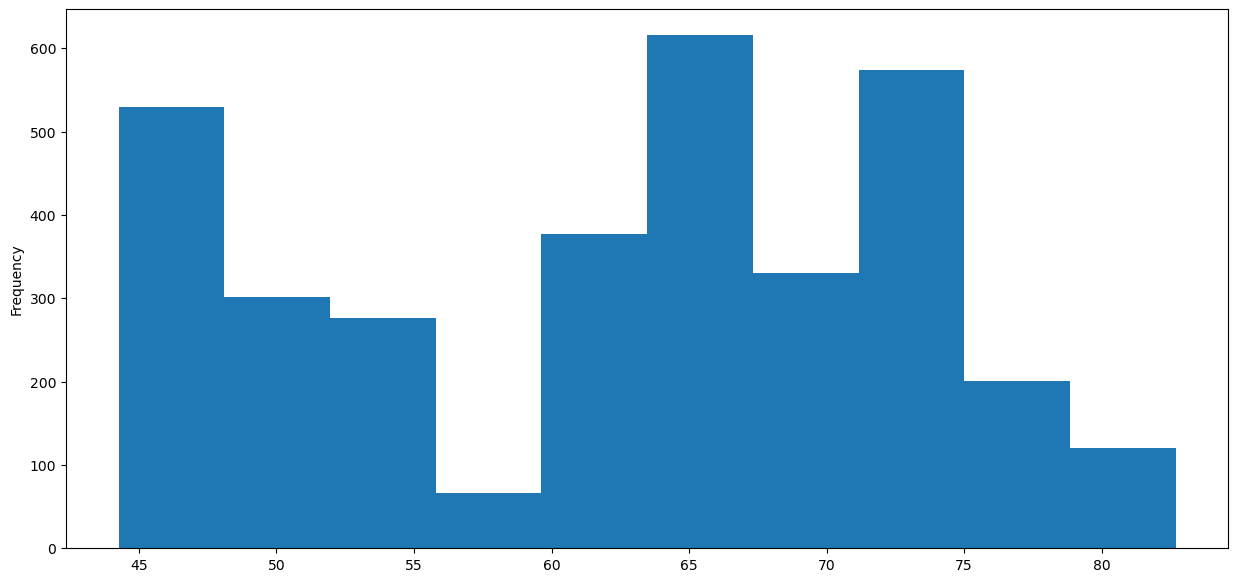

In [32]:
plt.figure(figsize = (15, 7))
df['MA'].plot(kind ="hist")

In [36]:
#df['MA'].corr()

<AxesSubplot:ylabel='Frequency'>

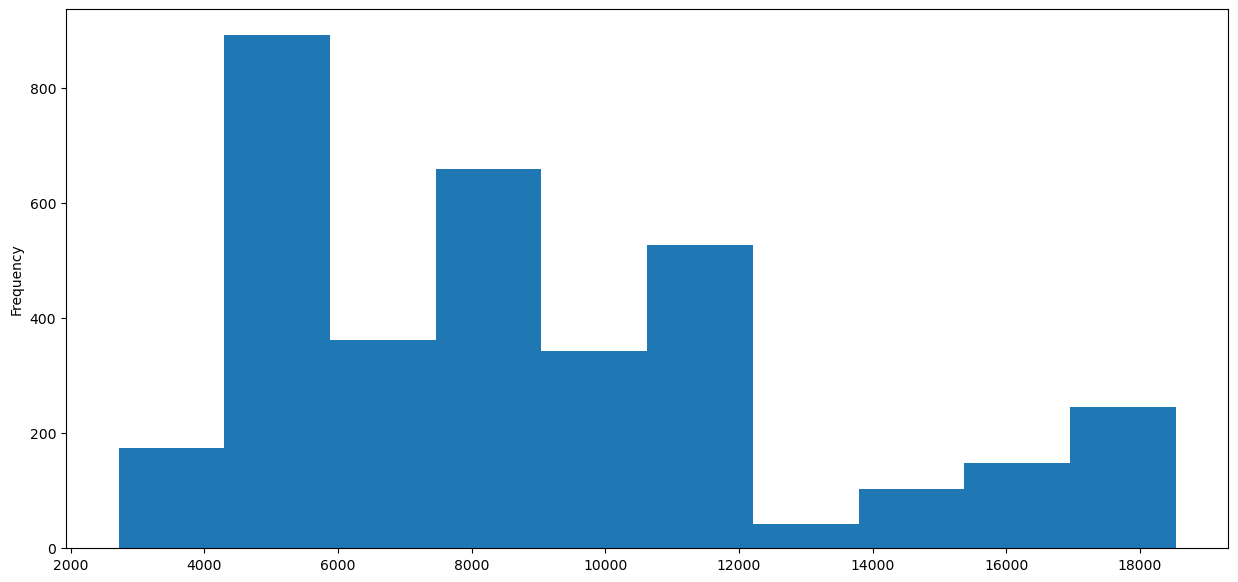

In [37]:
plt.figure(figsize = (15, 7))
df1['MA1'].plot(kind ="hist")

In [38]:
corr = df.corrwith(df1)
print(corr)

Open         0.864403
High         0.863519
Low          0.866446
Close        0.863980
Adj Close    0.863980
MA                NaN
MA1               NaN
STD               NaN
STD1              NaN
dtype: float64


In [39]:
corr = df.corrwith(df1,method='kendall')
print(corr)

Open         0.704206
High         0.702617
Low          0.707504
Close        0.704379
Adj Close    0.704379
MA                NaN
MA1               NaN
STD               NaN
STD1              NaN
dtype: float64


In [40]:
core= df['MA'].corr(df1['MA1'],method='spearman')
print(core)

0.9057038066318361


In [41]:
data = pd.read_csv("C:/Users/alish/Downloads/the-usual-suspects-1995-english-yify-124483/Dummy.csv", index_col = 'Date', parse_dates=True)
data

C:\Users\alish\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '29-09-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\alish\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '30-09-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\alish\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '13-10-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\alish\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '14-10-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\alish\anaconda3\lib

,Correlation
Date,
2008-09-29,-0.876537
2008-09-30,-0.912929
2008-01-10,-0.941117
2008-03-10,-0.939678
2008-06-10,-0.944719
...,...
2023-03-01,-0.766243
2023-04-01,-0.771610
2023-05-01,-0.724537


<AxesSubplot:xlabel='Date'>

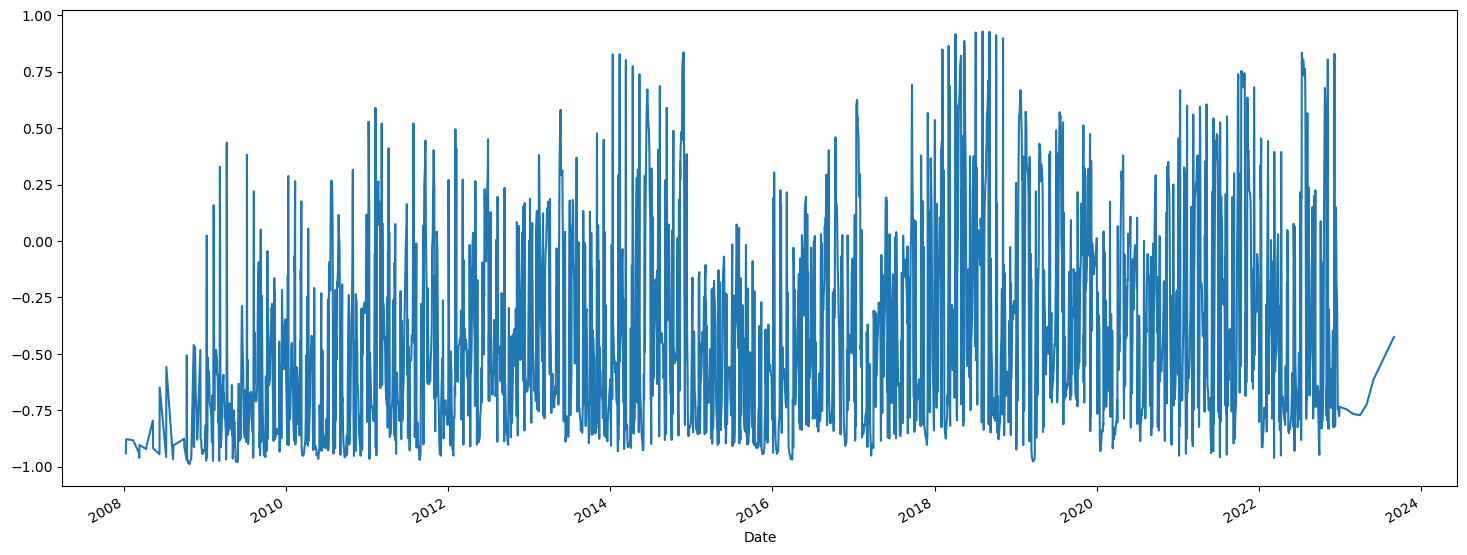

In [52]:
data['Correlation'].plot(figsize = (18,7))

In [43]:
#to confirm our date is date as per the system
isinstance(data.index, pd.DatetimeIndex)

True